## Customer Churn Analysis
This notebook presents an exploratory data analysis of customer churn, identifying key demographics and service-related factors that influence whether a customer will churn. The analysis focuses on understanding the characteristics of churned customers to inform retention strategies.

# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Reading and getting the basic idea of the data

In [4]:
df=pd.read_csv('Customer Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Renamed columns to CamelCase


In [23]:
df.rename(columns={'customerID':'CustomerID',
                   'gender':'Gender',
                   'tenure':'Tenure'},inplace=True)

In [11]:
df.loc[df['TotalCharges'] == ' ']['TotalCharges'].count()

np.int64(11)

- Replacing blanks with 0 as tenure is 0 and no total charges are recorded and they as blank (containing blank spaces) .
- Converting TotalCharges column to float type

In [13]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [16]:
df.loc[df['TotalCharges']==" "]['TotalCharges']

,TotalCharges


In [17]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No null values found

## Getting basic stats from the present numeric data

In [27]:
df.describe().round(2)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


In [20]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['CustomerID'].duplicated().sum()

np.int64(0)

- Converted 0/1 (boolean value) of Senior Citizen to Yes/No to make it easier to understand

In [30]:
def conv(value):
  if value == 1 :
    return "Yes"
  else:
    return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [31]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

Text(0, 0.5, 'Total')

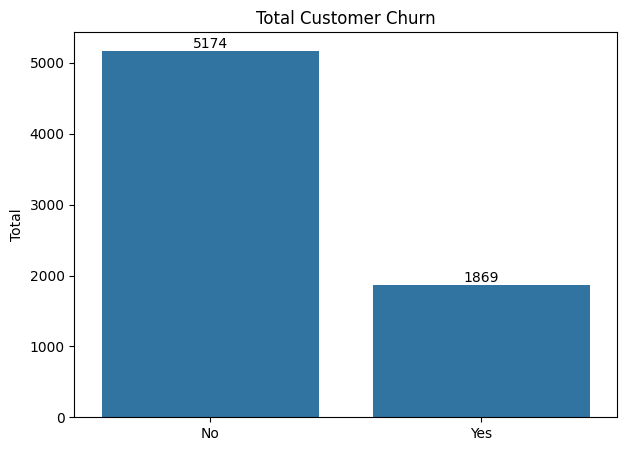

In [51]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('Total Customer Churn')
plt.xlabel('')
plt.ylabel('Total')

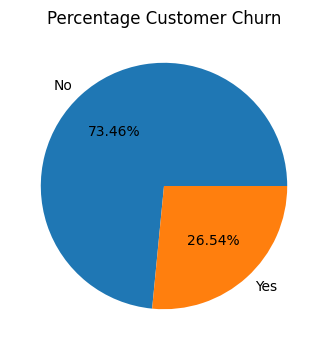

In [50]:
plt.figure(figsize=(4,4))
gb=df.groupby(['Churn']).agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
# plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage Customer Churn')
plt.show()

## From the above figure we can conclude that 26.54% of our customers have churned out.

- Total Customers : `7043`  (100%)
- Churned Customers : `1869` (26.54%)
- Remaining Customers : `5174` (73.46%)

### Now exploring the reason for the churn

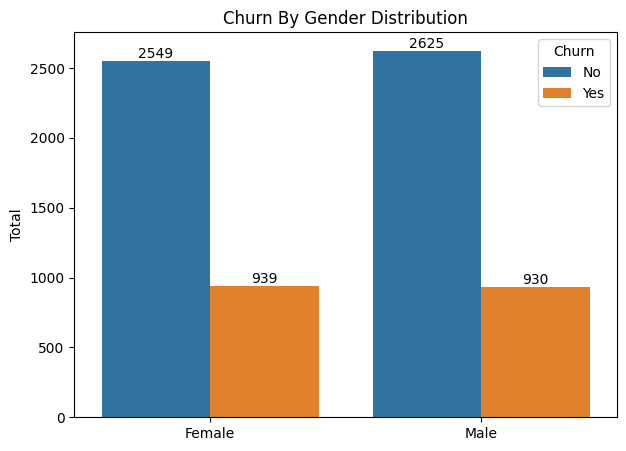

In [64]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='Gender',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn By Gender Distribution')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

#### Both male and female have almost same churn , comparitively `Females` have slightly more churn than `Males`
Total Females : `2549`
- Female Churn : ` 939`

Total Males: `2625`
- Male Churn : `930`

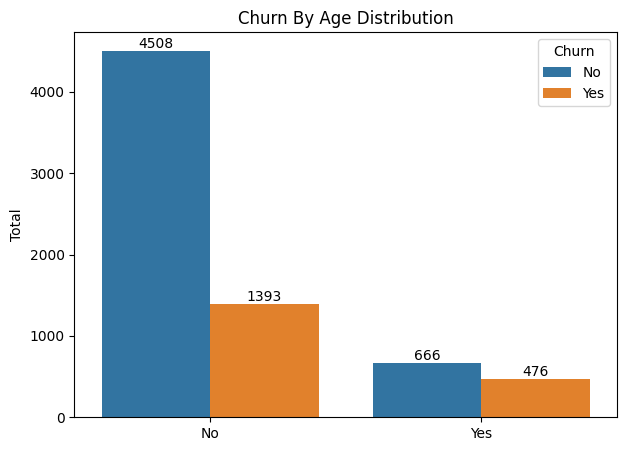

In [65]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn By Age Distribution')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

([<matplotlib.patches.Wedge at 0x7da82d256630>,
 [Text(-0.9603414716655103, 0.5364179879527924, 'No'),
  Text(0.9603413906686367, -0.5364181329603142, 'Yes')],
 [Text(-0.5238226209084601, 0.2925916297924322, '83.8%'),
  Text(0.5238225767283472, -0.29259170888744407, '16.2%')])

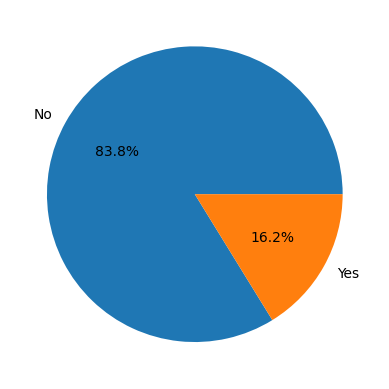

In [103]:
gb=df.groupby(['SeniorCitizen']).agg({'SeniorCitizen':'count'})
plt.pie(df['SeniorCitizen'].value_counts(),labels=df['SeniorCitizen'].value_counts().index,autopct='%1.1f%%')

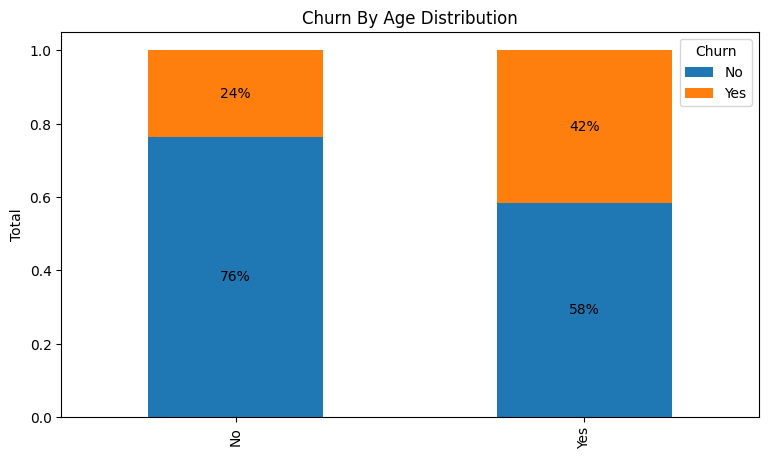

In [84]:
total_counts=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

fig,ax=plt.subplots(figsize=(9,5))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4','#ff7f0e'])

## Add percentage on labels
for p in ax.patches:
  width,height= p.get_width(),p.get_height()
  x,y=p.get_xy()
  ax.text(x+width/2,y+height/2,'{:.0f}%'.format(height*100),ha='center',va='center')
plt.title('Churn By Age Distribution')
plt.xlabel('')
plt.ylabel('Total')
plt.legend(title='Churn', loc='upper right')


### By the above figures we can conclude that
- `42%` of the total senior citizen customers have churned out.
- `24%` of the total non senior customer have churned out.

<Axes: xlabel='Tenure', ylabel='Count'>

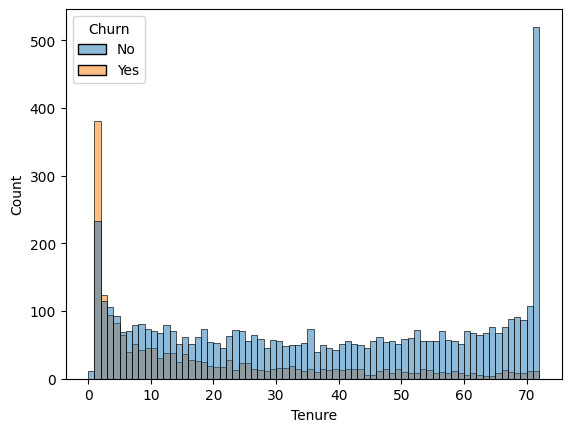

In [97]:
sns.histplot(x=df['Tenure'],data=df,bins=72,hue='Churn')

### Observations by tenure
- Max churn is in 1st month
- Most of the churn is in the initial timeperiod
- People who have used our services for a long time have stayed

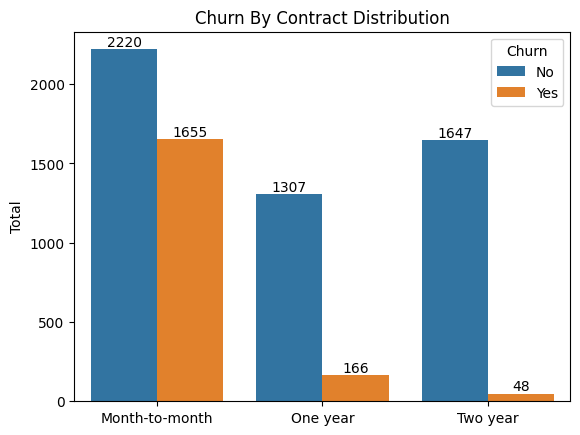

In [108]:
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn By Contract Distribution')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

## Observations by contract
- Customers with Month-to-month contract have very high churn as compared to customers with yearly plan

In [109]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
plt.subplots()

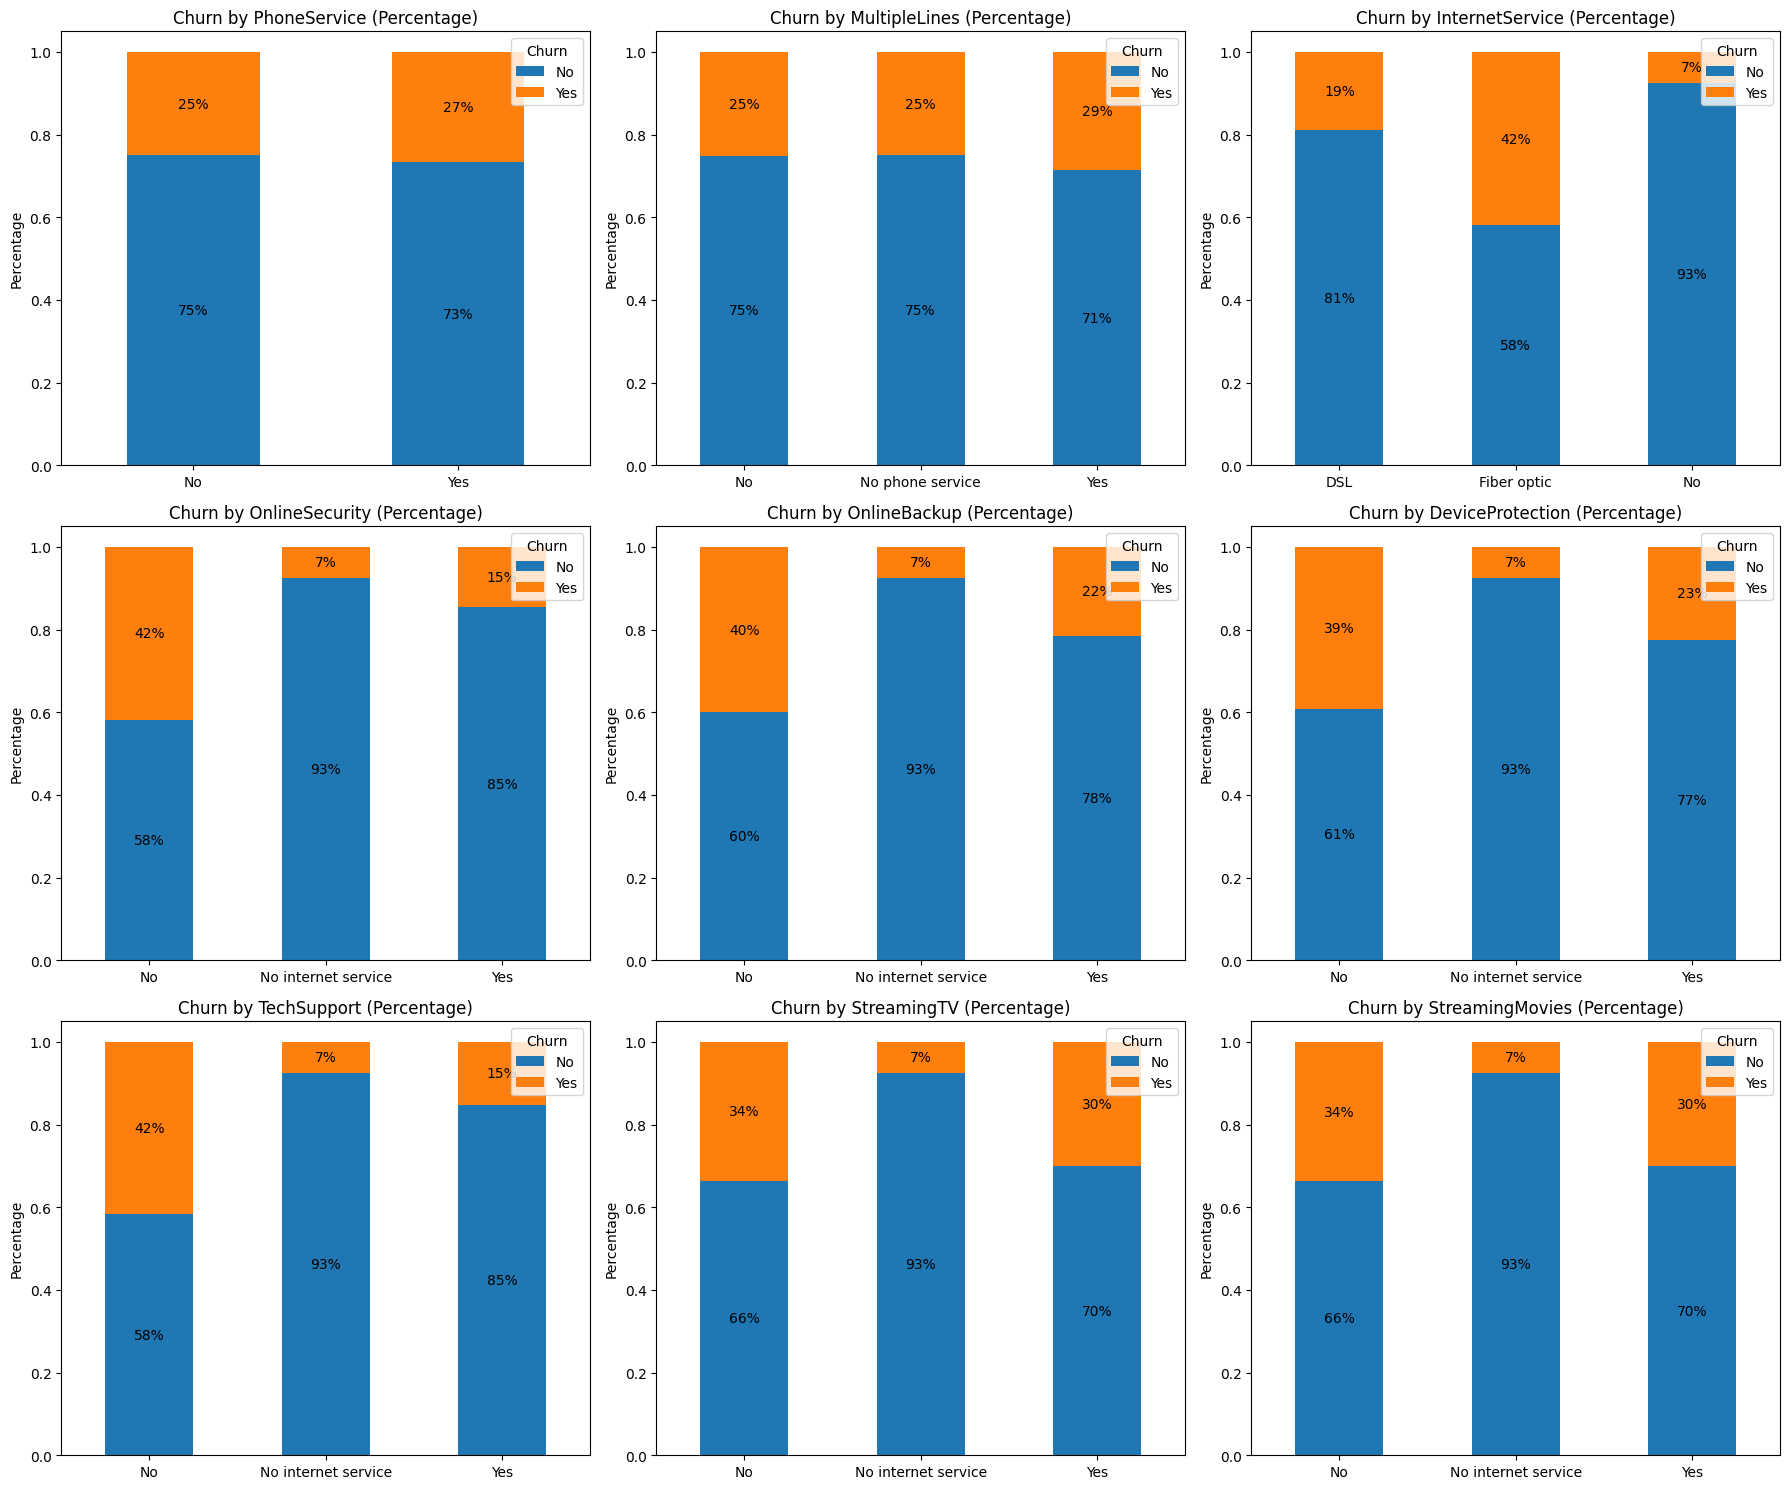

In [111]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    # Calculate churn percentages for the current column
    churn_percentages = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()

    # Plot as a stacked bar chart on the current subplot axis
    ax = churn_percentages.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4','#ff7f0e'])

    # Add percentage labels
    for container in ax.containers:
        for p in container.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            # Only label if height is not zero
            if height > 0:
                ax.text(x + width / 2, y + height / 2, '{:.0f}%'.format(height * 100), ha='center', va='center')

    ax.set_title(f'Churn by {col} (Percentage)')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

## Observations

- Customers who have not opted for services like **Online Security**, **Online Backup**, **Device Protection**. `40%` them have churned
- `40%` of customers with **Fiber Optic Connection** have also churned

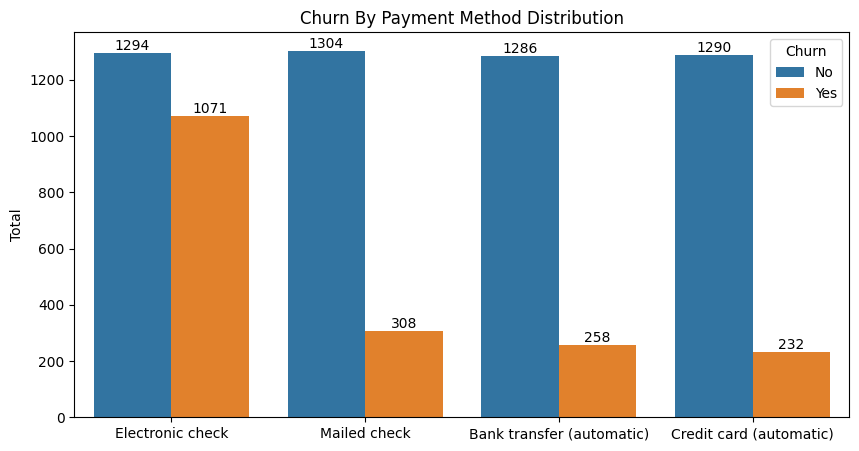

In [115]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn By Payment Method Distribution')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

# Observations from payment method
- Customers with **automatic payment** method have very less churn rate
- Customers Electronic check payment mode have most churn

# Report

## Executive Summary: Customer Churn Analysis

**Objective** : The analysis primarily investigates factors influencing customer churn, particularly focusing on payment methods and contract types

### Key Observations:

1.  **Overall Churn Rate**: Approximately **26.54%** of the customer base has churned, indicating a significant retention challenge.
2.  **Demographic Influence**:
    *   **Gender**: Churn rates are very similar between male and female customers, with a slight edge in female churn.
    *   **Senior Citizens**: A notably higher percentage of senior citizens (**42%**) churn compared to non-senior citizens (**24%**), suggesting this demographic is at greater risk.
3.  **Tenure Impact**: Customer churn is highest in the initial months of service, decreasing significantly as tenure increases. Long-term customers show greater loyalty.
4.  **Contract Type**: Customers on a **month-to-month contract** exhibit a substantially higher churn rate compared to those with one-year or two-year contracts, highlighting the importance of long-term commitments.
5.  **Service Subscriptions**:
    *   Absence of services like **Online Security, Online Backup, Device Protection, and Tech Support** is strongly correlated with increased churn (around **40%** of customers without these services churned).
    *   Customers with **Fiber Optic internet service** also show a higher churn rate (**40%**).
6.  **Payment Method**: Customers using **Electronic Check** payment methods have the highest churn rate, whereas those with automatic payment methods (Bank Transfer or Credit Card) show lower churn.

### Conclusion:

Customer churn is primarily driven by factors such as short tenure, flexible month-to-month contracts, lack of security and support services, and specific payment preferences (Electronic Check). The senior citizen demographic also represents a high-risk group. Addressing these areas through targeted retention campaigns, incentivizing longer contracts, promoting value-added services, and exploring alternative payment solutions could significantly improve customer retention.